In [1]:
import numpy as np
def init_cent(dataset,K):
    idx=np.random.choice(np.arange(len(dataset)),size=K,replace=False)
    return dataset[idx]
def Kmeans(dataset,K,init_cent):
    centroids=init_cent(dataset,K)
    cluster=np.zeros(len(dataset))
    changed=True
    while changed:
        changed=False
        loss=0
        for i,data in enumerate(dataset):
            dis=np.sum((centroids-data)**2,axis=-1)
            k=np.argmin(dis)
            if cluster[i]!=k:
                cluster[i]=k
                changed=True
            loss+=np.sum((data-centroids[k])**2)
        for i in range(K):
            centroids[i]=np.mean(dataset[cluster==i],axis=0)
    return centroids,cluster


In [2]:
from sklearn.cluster import KMeans  
import numpy as np  
  
# 创建一个随机数据集  
X = np.random.rand(100, 2)  
  
# 创建KMeans聚类模型，设置簇的数量为3  
kmeans = KMeans(n_clusters=3)  
  
# 使用数据集拟合模型  
kmeans.fit(X)  
  
# 输出聚类中心点  
print("Cluster centers:")  
print(kmeans.cluster_centers_)  
  
# 对数据集进行预测，得到每个数据点的聚类标签  
labels = kmeans.predict(X)  
print("Labels of data points:")  
print(labels)

Cluster centers:
[[0.23767428 0.76375038]
 [0.49918583 0.20096371]
 [0.81328618 0.66813257]]
Labels of data points:
[1 1 2 0 1 0 1 1 0 0 0 0 0 2 2 0 1 1 0 0 1 0 1 0 0 2 2 2 1 0 2 2 1 2 2 1 1
 0 0 1 2 1 1 0 1 2 2 2 1 2 1 2 0 1 1 2 0 2 0 1 0 2 0 0 1 2 0 2 0 0 2 2 2 0
 2 2 1 1 0 2 1 1 2 1 0 0 0 1 2 0 2 2 0 2 2 2 2 0 1 2]


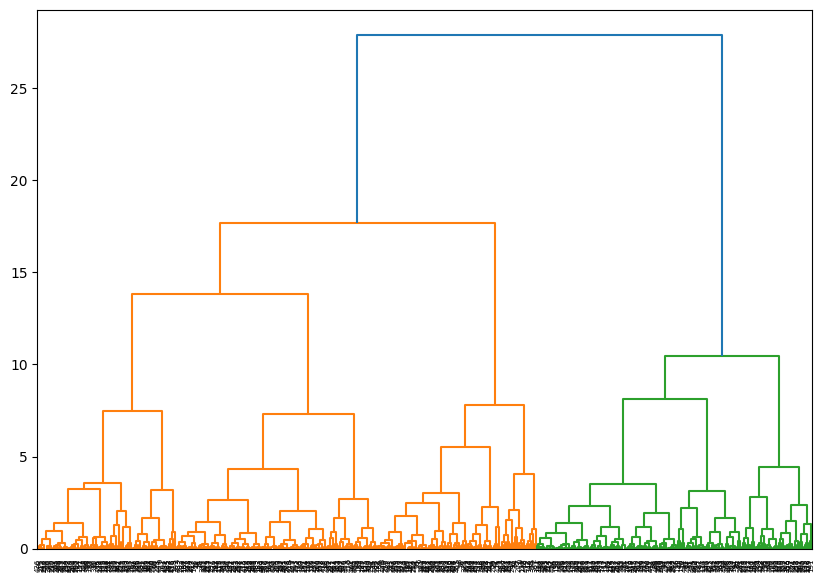

In [3]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.cluster.hierarchy import dendrogram, linkage  
  
# 生成随机数据  
np.random.seed(0)  
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=500)  
  
# 执行层次聚类  
linked = linkage(X, 'ward')  
  
# 绘制层次聚类模型图  
fig = plt.figure(figsize=(10, 7))  
dendrogram(linked,  
           orientation='top',  
           distance_sort='descending',  
           show_leaf_counts=True)  
plt.show()

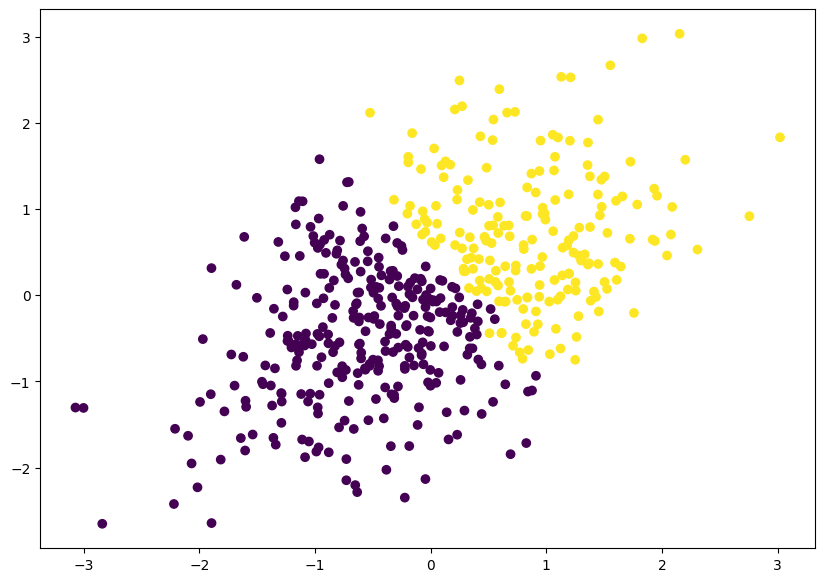

In [4]:
from sklearn.cluster import AgglomerativeClustering  
import matplotlib.pyplot as plt  
  
# 生成随机数据  
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=500)  
  
# 执行层次聚类  
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory='auto')  
cluster.fit(X)  
labels = cluster.labels_  
  
# 绘制层次聚类模型图  
fig = plt.figure(figsize=(10, 7))  
plt.scatter(X[:, 0], X[:, 1], c=labels)  
plt.show()

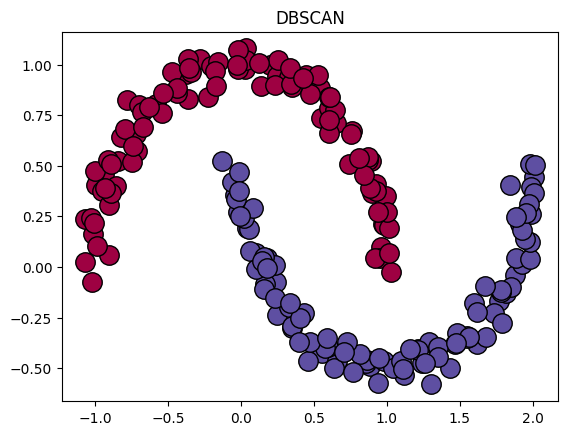

In [5]:
from sklearn.cluster import DBSCAN  
from sklearn.datasets import make_moons  
import matplotlib.pyplot as plt  
  
# 生成半月形数据集  
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)  
  
# 执行DBSCAN聚类  
dbscan = DBSCAN(eps=0.3, min_samples=5)  
dbscan.fit(X)  
labels = dbscan.labels_  
  
# 绘制聚类结果  
unique_labels = set(labels)  
colors = [plt.cm.Spectral(each)  
          for each in np.linspace(0, 1, len(unique_labels))]  
for k, col in zip(unique_labels, colors):  
    if k == -1:  
        # Black used for noise.  
        col = [0, 0, 0, 1]  
  
    class_member_mask = (labels == k)  
  
    xy = X[class_member_mask & (labels != -1)]  
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),  
             markeredgecolor='k', markersize=14)  
  
plt.title('DBSCAN')  
plt.show()

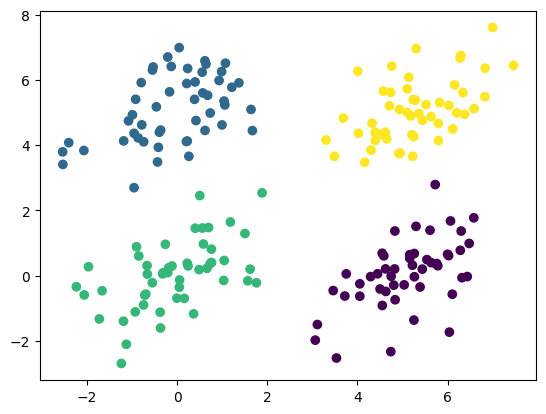

In [6]:
from sklearn.mixture import GaussianMixture  
import numpy as np  
import matplotlib.pyplot as plt  
  
# 生成随机样本数据  
np.random.seed(0)  
X = np.concatenate([  
    np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 50),  
    np.random.multivariate_normal([0, 5], [[1, 0.5], [0.5, 1]], 50),  
    np.random.multivariate_normal([5, 0], [[1, 0.5], [0.5, 1]], 50),  
    np.random.multivariate_normal([5, 5], [[1, 0.5], [0.5, 1]], 50)  
])  
  
# 使用GaussianMixture进行聚类  
gmm = GaussianMixture(n_components=4)  
gmm.fit(X)  
labels = gmm.predict(X)  
  
# 可视化聚类结果  
plt.scatter(X[:, 0], X[:, 1], c=labels)  
plt.show()